In [1]:
import warnings as En_Offen_span__w
En_Offen_span__w.filterwarnings("ignore")
import pandas as En_Offen_span__N
import nltk as En_Offen_span__Tk
En_Offen_span__Tk.download('stopwords')
import regex as En_Offen_span__XR
from nltk.corpus import stopwords as En_Offen_span__DS
from nltk.stem.porter import PorterStemmer as En_Offen_span__RP
from sklearn import preprocessing as En_Offen_span__ss

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Arpana\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
####### English offensive language
En_Offen_span_1 = En_Offen_span__N.read_csv('English_final.csv')
En_Offen_span_1

,tweet,hate/offensive
0,rt mayasolov woman complain clean hous amp man...,0
1,rt mleew boy dat cold tyga dwn bad cuffin dat ...,1
2,rt urkindofbrand dawg rt sbabi life ever fuck ...,1
3,rt c g anderson viva base look like tranni,1
4,rt shenikarobert shit hear might true might fa...,1
...,...,...
24778,muthaf lie lifeask pearl corey emanuel right t...,1
24779,gone broke wrong heart babi drove redneck crazi,0
24780,young buck wanna eat dat nigguh like aint fuck...,1
24781,youu got wild bitch tellin lie,1


In [3]:
En_Offen_span_1['hate/offensive'].value_counts()

1    20620
0     4163
Name: hate/offensive, dtype: int64

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer as En_Offen_span_1tf

En_Offen_span_1zer = En_Offen_span_1tf(analyzer='word', ngram_range= (1,1))
En_Offen_span_1x = En_Offen_span_1zer.fit_transform(En_Offen_span_1['tweet'].values.astype('U')).toarray()

In [5]:
En_Offen_span_1x.shape

(24783, 30396)

In [6]:
En_Offen_span_1y = En_Offen_span_1['hate/offensive']

In [7]:
En_Offen_span_1y.shape

(24783,)

In [8]:
from sklearn.model_selection import train_test_split as En_Offen_span_1trs

En_tssi =0.4
En_rast = 40
En_tssi1 =0.5

En_Offen_span_1xr, En_Offen_span_1xe, En_Offen_span_1yr, En_Offen_span_1ye = En_Offen_span_1trs(En_Offen_span_1x, En_Offen_span_1y, test_size=En_tssi, random_state= En_rast)
En_Offen_span_1xd, En_Offen_span_1xe, En_Offen_span_1yd, En_Offen_span_1ye = En_Offen_span_1trs(En_Offen_span_1xe, En_Offen_span_1ye, test_size= En_tssi1, random_state= En_rast)

print(En_Offen_span_1xr.shape)
print(En_Offen_span_1xd.shape)
print(En_Offen_span_1xe.shape)

(14869, 30396)
(4957, 30396)
(4957, 30396)


In [9]:
from sklearn.metrics import classification_report as En_Offen_span_1cffr
from sklearn.metrics import confusion_matrix as En_Offen_span_1cfmt
from sklearn.metrics import ConfusionMatrixDisplay as En_Offen_span_1cmxd
from sklearn.model_selection import GridSearchCV as En_Offen_span_1grdsh
import time as En_Offen_span_1tiim

In [10]:
from sklearn.svm import SVC as En_Offen_span_1spv

En_Hypm = { 'kernel': ['sigmoid','poly','rbg','linear'],
               'gamma': ['auto','scale'],
               'degree':[2,3,4,5,6,7]}


En_Hypm_vsb = En_Offen_span_1spv(random_state= En_rast)
En_Hypm_vsb = En_Offen_span_1grdsh(En_Hypm_vsb, En_Hypm,
                          cv=2, verbose=10)
En_Hypm_vsb.fit(En_Offen_span_1xr[:500], En_Offen_span_1yr[:500])

print(En_Hypm_vsb.best_params_)
print("score-En_Offen_span_1: ", En_Hypm_vsb.best_score_)

Fitting 2 folds for each of 48 candidates, totalling 96 fits
[CV 1/2; 1/48] START degree=2, gamma=auto, kernel=sigmoid.......................
[CV 1/2; 1/48] END degree=2, gamma=auto, kernel=sigmoid;, score=0.848 total time=   2.9s
[CV 2/2; 1/48] START degree=2, gamma=auto, kernel=sigmoid.......................
[CV 2/2; 1/48] END degree=2, gamma=auto, kernel=sigmoid;, score=0.852 total time=   2.2s
[CV 1/2; 2/48] START degree=2, gamma=auto, kernel=poly..........................
[CV 1/2; 2/48] END degree=2, gamma=auto, kernel=poly;, score=0.848 total time=   1.6s
[CV 2/2; 2/48] START degree=2, gamma=auto, kernel=poly..........................
[CV 2/2; 2/48] END degree=2, gamma=auto, kernel=poly;, score=0.852 total time=   3.0s
[CV 1/2; 3/48] START degree=2, gamma=auto, kernel=rbg...........................
[CV 1/2; 3/48] END degree=2, gamma=auto, kernel=rbg;, score=nan total time=   0.0s
[CV 2/2; 3/48] START degree=2, gamma=auto, kernel=rbg...........................
[CV 2/2; 3/48] END d

[CV 1/2; 25/48] END degree=5, gamma=auto, kernel=sigmoid;, score=0.848 total time=   2.9s
[CV 2/2; 25/48] START degree=5, gamma=auto, kernel=sigmoid......................
[CV 2/2; 25/48] END degree=5, gamma=auto, kernel=sigmoid;, score=0.852 total time=   2.7s
[CV 1/2; 26/48] START degree=5, gamma=auto, kernel=poly.........................
[CV 1/2; 26/48] END degree=5, gamma=auto, kernel=poly;, score=0.848 total time=   2.6s
[CV 2/2; 26/48] START degree=5, gamma=auto, kernel=poly.........................
[CV 2/2; 26/48] END degree=5, gamma=auto, kernel=poly;, score=0.852 total time=   2.0s
[CV 1/2; 27/48] START degree=5, gamma=auto, kernel=rbg..........................
[CV 1/2; 27/48] END degree=5, gamma=auto, kernel=rbg;, score=nan total time=   0.0s
[CV 2/2; 27/48] START degree=5, gamma=auto, kernel=rbg..........................
[CV 2/2; 27/48] END degree=5, gamma=auto, kernel=rbg;, score=nan total time=   0.0s
[CV 1/2; 28/48] START degree=5, gamma=auto, kernel=linear................


 training duration: 24.65631413459778 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       836
           1       0.83      1.00      0.91      4121

    accuracy                           0.83      4957
   macro avg       0.42      0.50      0.45      4957
weighted avg       0.69      0.83      0.75      4957


 validation duration: 107.73232245445251 



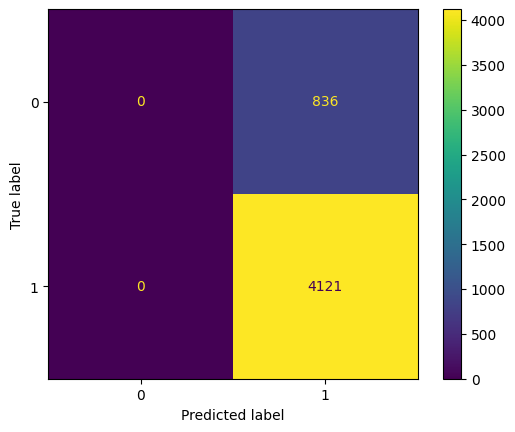

In [11]:
En_pd1 = En_Offen_span_1tiim.time()

En_Offen_span_MdB= En_Offen_span_1spv(**En_Hypm_vsb.best_params_)
En_Offen_span_MdB.fit(En_Offen_span_1xr[:1000], En_Offen_span_1yr[:1000])

En_pd2 = En_Offen_span_1tiim.time()
print("\n training duration:", En_pd2-En_pd1,"\n")


En_pd1 = En_Offen_span_1tiim.time()

En_Offen_span_pct= En_Offen_span_MdB.predict(En_Offen_span_1xd)

print(En_Offen_span_1cffr(En_Offen_span_1yd, En_Offen_span_pct))

En_tk = En_Offen_span_1cfmt(En_Offen_span_1yd,En_Offen_span_pct)
En_rd = En_Offen_span_1cmxd(confusion_matrix = En_tk, display_labels = [0,1])
En_rd.plot()

En_pd2= En_Offen_span_1tiim.time()
print("\n validation duration:", En_pd2-En_pd1,"\n")

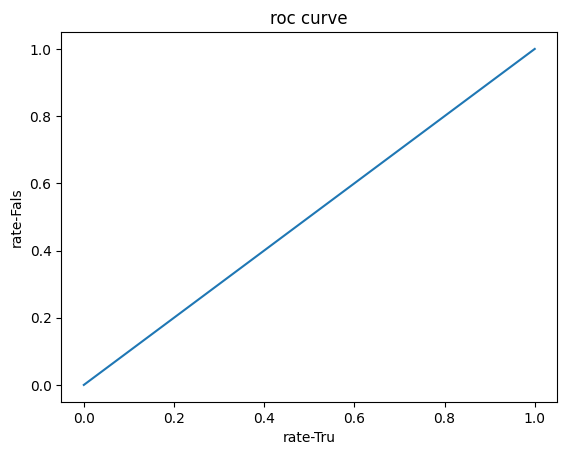

auc- curve: 0.5


In [13]:
from sklearn.metrics import roc_curve as En_Offen_span_rc
from sklearn.metrics import roc_auc_score as En_Offen_span_ac
import matplotlib.pyplot as En_Offen_span_mt

En_Offen_span_Fals, En_Offen_span_tre, En_Offen_span_ths = En_Offen_span_rc(En_Offen_span_1yd, En_Offen_span_pct)
En_Offen_span_mt.plot(En_Offen_span_Fals, En_Offen_span_tre)
En_Offen_span_mt.ylabel('rate-Fals')
En_Offen_span_mt.xlabel('rate-Tru')
En_Offen_span_mt.title('roc curve')
En_Offen_span_mt.show()
print('auc- curve:', En_Offen_span_ac(En_Offen_span_1yd, En_Offen_span_pct))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       859
           1       0.83      1.00      0.91      4098

    accuracy                           0.83      4957
   macro avg       0.41      0.50      0.45      4957
weighted avg       0.68      0.83      0.75      4957


 testing duration: 107.75154948234558 



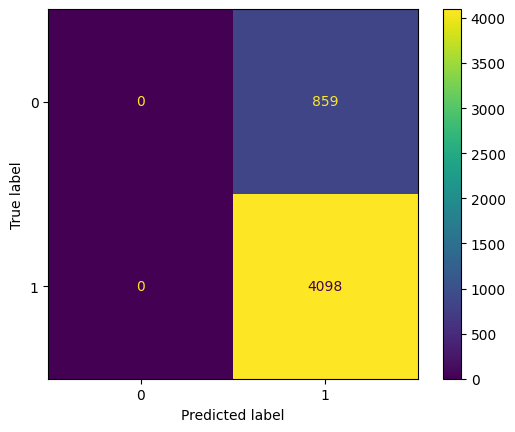

In [14]:
En_pd1 = En_Offen_span_1tiim.time()

En_Offen_span_pct= En_Offen_span_MdB.predict(En_Offen_span_1xe)

print(En_Offen_span_1cffr(En_Offen_span_1ye, En_Offen_span_pct))

En_tk = En_Offen_span_1cfmt(En_Offen_span_1ye,En_Offen_span_pct)
En_rd = En_Offen_span_1cmxd(confusion_matrix = En_tk, display_labels = [0,1])
En_rd.plot()

En_pd2= En_Offen_span_1tiim.time()
print("\n testing duration:", En_pd2-En_pd1,"\n")

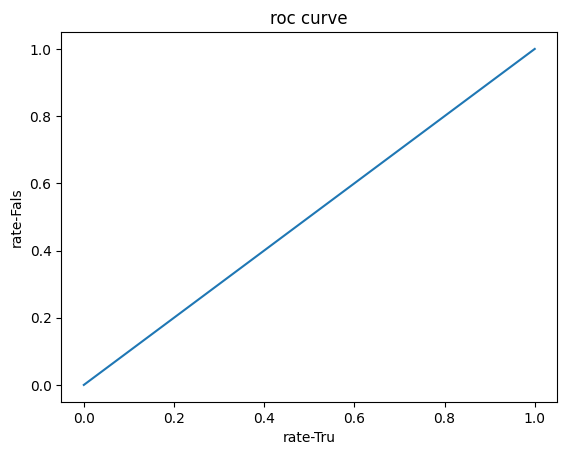

auc- curve: 0.5


In [15]:
En_Offen_span_Fals, En_Offen_span_tre, En_Offen_span_ths = En_Offen_span_rc(En_Offen_span_1ye, En_Offen_span_pct)
En_Offen_span_mt.plot(En_Offen_span_Fals, En_Offen_span_tre)
En_Offen_span_mt.ylabel('rate-Fals')
En_Offen_span_mt.xlabel('rate-Tru')
En_Offen_span_mt.title('roc curve')
En_Offen_span_mt.show()
print('auc- curve:', En_Offen_span_ac(En_Offen_span_1ye, En_Offen_span_pct))